Функция восстановления исходного изображения

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Загрузка матрицы счетов (примем, что она находится в файле scores.csv)
scores_df = pd.read_csv('/content/sample_data/X_reduced_792.csv', header=None)
scores = scores_df.values

# Загрузка матрицы весов (примем, что она находится в файле eigenvectors.csv)
eigenvectors_df = pd.read_csv('/content/sample_data/X_loadings_792.csv', header=None)
eigenvectors = eigenvectors_df.values

In [22]:
def reconstruct_image(scores, eigenvectors, X_mean, num_components=10):
  """
  Восстанавливает исходное изображение по первым num_components главным компонентам.

  Args:
    scores: Матрица счетов.
    eigenvectors: Матрица весов.
    X_mean: Среднее значение исходных данных.
    num_components: Количество используемых главных компонент.

  Returns:
    Восстановленное изображение.
  """

  # Выбираем первые num_components главных компонент
  reduced_scores = scores[:, :num_components]
  reduced_eigenvectors = eigenvectors[:, :num_components]

  # Восстановление изображения
  X_reconstructed = np.dot(reduced_scores, reduced_eigenvectors.T)

  return X_reconstructed

# Предположим, что у вас есть среднее значение исходных данных X_mean
# Восстановление изображения
X_mean = eigenvectors - np.mean(eigenvectors, axis=0)
reconstructed_image = reconstruct_image(scores, eigenvectors, X_mean, num_components=10)

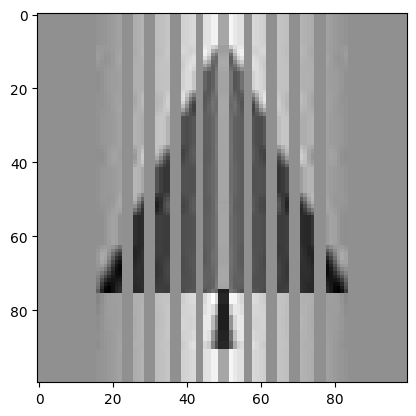

In [24]:
# Предполагаем, что reconstructed_image имеет размерность (height, width)
plt.imshow(reconstructed_image.reshape(100, 100), cmap='gray')
plt.show()